In [1]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 2.6 MB/s 
     |████████████████████████████████| 9.8 MB 39.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import keras
import pmdarima as pm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rishiraj-cs/Datasets/master/Facebook_stock.csv')
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2016-03-31,115.010002,113.769997,114.699997,114.099998,21207500,114.099998
1,2016-04-01,116.169998,113.349998,113.750000,116.059998,24760500,116.059998
2,2016-04-04,114.550003,111.610001,114.070000,112.550003,48487900,112.550003
3,2016-04-05,113.320000,111.900002,112.110001,112.220001,22962400,112.220001
4,2016-04-06,113.809998,112.419998,112.470001,113.709999,20814600,113.709999
...,...,...,...,...,...,...,...
1255,2021-03-25,288.059998,277.750000,280.980011,278.739990,24505600,278.739990
1256,2021-03-26,284.500000,277.769989,278.299988,283.019989,17620600,283.019989
1257,2021-03-29,293.179993,284.700012,285.769989,290.820007,21718800,290.820007
1258,2021-03-30,292.470001,286.700012,289.829987,288.000000,17474500,288.000000


In [3]:
df.dtypes

Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

In [4]:
from statsmodels.tsa.stattools import adfuller

Text(0, 0.5, 'CLOSE')

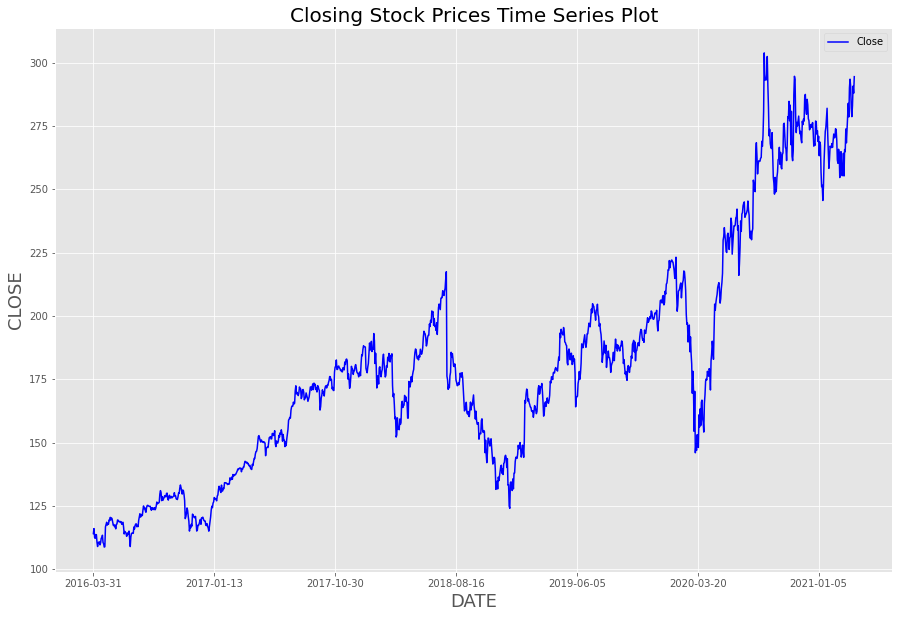

In [5]:
axl = df.plot(kind='line', x='Date', y='Close', color='blue', figsize=(15, 10))
plt.title('Closing Stock Prices Time Series Plot', size=20)
plt.xlabel('DATE', size=18)
plt.ylabel('CLOSE', size=18)

In [6]:
adFuller = adfuller(df['Close'].values, autolag='AIC')
print(f'P value = {adFuller[1]}')

P value = 0.8406950879738702


In [14]:
df['lag1'] = df['Close'].pct_change(1) 
df['lag2'] = df['Close'].pct_change(2)

Text(0, 0.5, 'lag1')

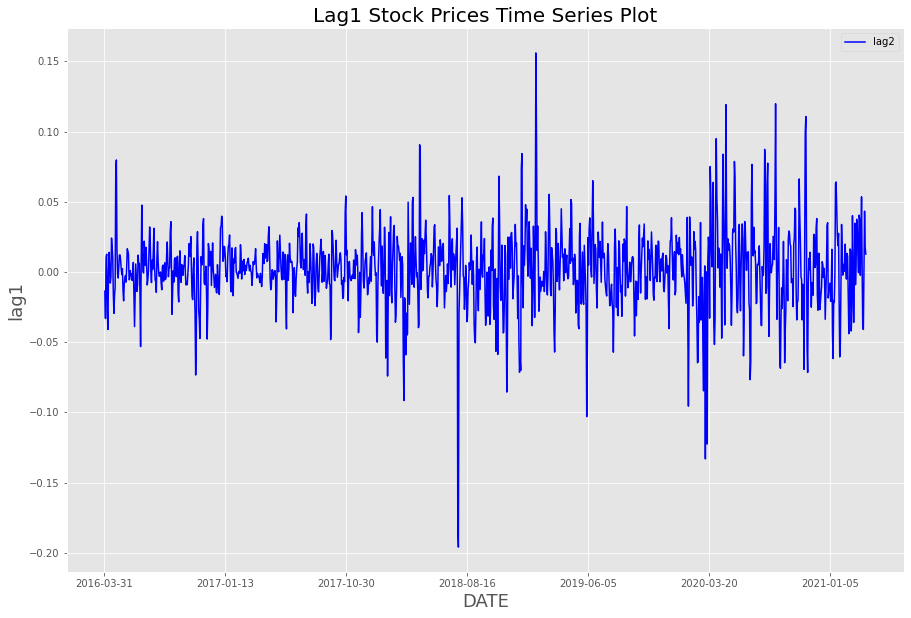

In [15]:
axl = df.plot(kind='line', x='Date', y='lag2', color='blue', figsize=(15, 10))
plt.title('Lag1 Stock Prices Time Series Plot', size=20)
plt.xlabel('DATE', size=18)
plt.ylabel('lag1', size=18)

In [17]:
adFuller = adfuller(df['lag2'].dropna().values, autolag='AIC')
print(f'P value = {adFuller[1]}')

P value = 5.978868430568939e-10


In [18]:
df

,Date,High,Low,Open,Close,Volume,Adj Close,lag1,lag2
0,2016-03-31,115.010002,113.769997,114.699997,114.099998,21207500,114.099998,NaN,NaN
1,2016-04-01,116.169998,113.349998,113.750000,116.059998,24760500,116.059998,0.017178,NaN
2,2016-04-04,114.550003,111.610001,114.070000,112.550003,48487900,112.550003,-0.030243,-0.013585
3,2016-04-05,113.320000,111.900002,112.110001,112.220001,22962400,112.220001,-0.002932,-0.033086
4,2016-04-06,113.809998,112.419998,112.470001,113.709999,20814600,113.709999,0.013277,0.010306
...,...,...,...,...,...,...,...,...,...
1255,2021-03-25,288.059998,277.750000,280.980011,278.739990,24505600,278.739990,-0.012051,-0.040911
1256,2021-03-26,284.500000,277.769989,278.299988,283.019989,17620600,283.019989,0.015355,0.003119
1257,2021-03-29,293.179993,284.700012,285.769989,290.820007,21718800,290.820007,0.027560,0.043338
1258,2021-03-30,292.470001,286.700012,289.829987,288.000000,17474500,288.000000,-0.009697,0.017596


##ARIMA model

Train and Validation split <br>
The first 80% of the time series (1000 observations) are used as training data. Here is a plot of the autocorrelation function as generated on this training set.

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


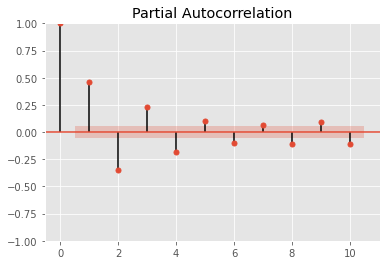

In [27]:
pacf = plot_pacf(df['lag2'].dropna(), lags = 10)

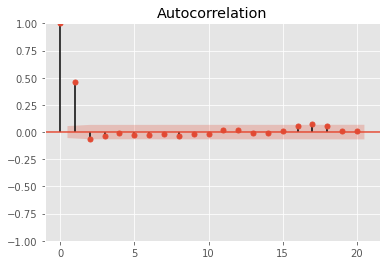

In [28]:
acf = plot_acf(df['lag2'].dropna(), lags = 20)

In [29]:
df = df[['Date', 'Close']]

In [30]:
df.set_index('Date', inplace = True)

In [31]:
df

,Close
Date,
2016-03-31,114.099998
2016-04-01,116.059998
2016-04-04,112.550003
2016-04-05,112.220001
2016-04-06,113.709999
...,...
2021-03-25,278.739990
2021-03-26,283.019989
2021-03-29,290.820007


In [48]:
Arima_model=pm.auto_arima(df['Close'], start_p=0, start_q=0, max_p=10, max_q=10, start_d = 0, max_d = 5, start_P=0, start_Q=0, max_P=10, max_Q=10, stepwise=True, seasonal=True, information_criterion='aic', trace=True, error_action='warn', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7063.524, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7058.895, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7059.015, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7063.145, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=7060.673, Time=0.25 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7056.024, Time=0.45 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7057.988, Time=0.99 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7057.976, Time=0.71 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=7060.982, Time=0.42 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7056.058, Time=1.17 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=7055.791, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=7058.890, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=7058.755, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=7057.734, Time=0.35 sec
 ARIMA(1,1,2)(0,0,0)[0]          

In [180]:
print(Arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -2586.015
Date:                Thu, 04 Nov 2021   AIC                           5176.030
Time:                        14:37:10   BIC                           5185.843
Sample:                             0   HQIC                          5179.760
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0947      0.018     -5.281      0.000      -0.130      -0.060
sigma2        10.3742      0.120     86.761      0.000      10.140      10.609
Ljung-Box (L1) (Q):                   0.00   Jarque-

In [181]:
prediction = Arima_model.predict(n_periods=260)

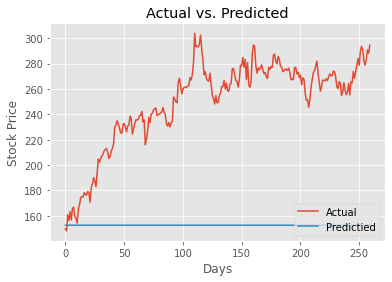

In [182]:
plt.plot(test)
plt.plot(prediction)
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend(["Actual", "Predictied"], loc ="lower right") 
plt.title("Actual vs. Predicted")
plt.show()

In [210]:
train = df[0:1200]

In [32]:
import warnings
warnings.filterwarnings('ignore')

In [33]:
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [49]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df['Close'][0:1200], order=(0,2,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1200
Model:                 ARIMA(0, 2, 2)   Log Likelihood               -3328.515
Date:                Thu, 04 Nov 2021   AIC                           6663.030
Time:                        15:45:21   BIC                           6678.296
Sample:                             0   HQIC                          6668.781
                               - 1200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0775      0.024    -44.841      0.000      -1.125      -1.030
ma.L2          0.0777      0.019      4.177      0.000       0.041       0.114
sigma2        15.0749      0.342     44.094      0.0

In [55]:
predict = model_fit.predict(start = 0, end = len(df)-1, dynamic = False)
df['predict'] = predict

In [56]:
test = df[1200:]
rmse = sqrt(mean_squared_error(test['Close'], test['predict']))
r2 = r2_score(test['Close'], test['predict'], multioutput='variance_weighted')
print(f'RMSE Error = {rmse}, R2_Score = {r2}')

RMSE Error = 10.782732701294742, R2_Score = 0.05663487165735126


In [52]:
df.reset_index(inplace = True)
df

,index,Date,Close,predict
0,0,2016-03-31,114.099998,0.000000
1,1,2016-04-01,116.059998,171.149931
2,2,2016-04-04,112.550003,118.021928
3,3,2016-04-05,112.220001,111.972081
4,4,2016-04-06,113.709999,111.514122
...,...,...,...,...
1255,1255,2021-03-25,278.739990,276.549943
1256,1256,2021-03-26,283.019989,276.679881
1257,1257,2021-03-29,290.820007,276.809819
1258,1258,2021-03-30,288.000000,276.939758


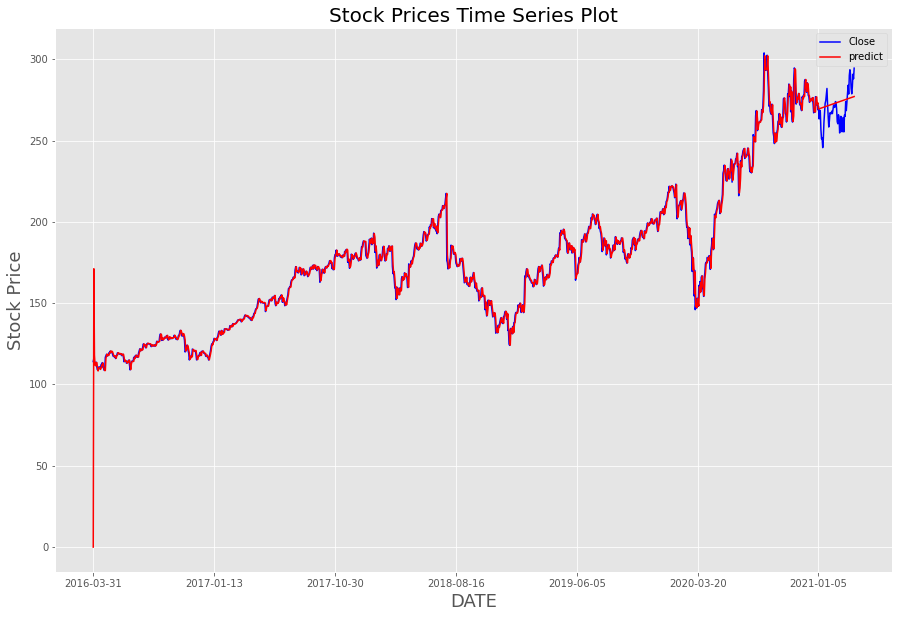

In [53]:
axl = df.plot(kind='line', x='Date', y='Close', color='blue', figsize=(15, 10))
df.plot(kind='line', x='Date', y='predict', color='red', figsize=(15, 10), ax = axl)
plt.title('Stock Prices Time Series Plot', size=20)
plt.xlabel('DATE', size=18)
plt.ylabel('Stock Price', size=18)
plt.legend()
plt.show()

##LSTM

In [57]:
train = df['Close'][0:1125].values
test = df['Close'][1125:].values

In [58]:
train_size = len(train)
test_size = len(test)

In [59]:
train = np.expand_dims(train,axis=1)
test = np.expand_dims(test,axis=1)

In [60]:
def create_dataset(df, previous=1):
    dataX, dataY = [], []
    for i in range(len(df)-previous-1):
        a = df[i:(i+previous), 0]
        dataX.append(a)
        dataY.append(df[i + previous, 0])
    return np.array(dataX), np.array(dataY)

In [61]:
scaler = MinMaxScaler(feature_range=(0, 1))
train = scaler.fit_transform(train)

In [64]:
test = scaler.fit_transform(test)

In [76]:
lookback = 5
X_train, Y_train = create_dataset(train, lookback)
X_test, Y_test = create_dataset(test, lookback)

In [77]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(1119, 5) (1119,) (129, 5) (129,)


In [78]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(1119, 1, 5) (1119,) (129, 1, 5) (129,)


In [79]:
# Generate LSTM network
model = keras.models.Sequential()
model.add(keras.layers.LSTM(4, input_shape=(1, lookback)))
model.add(keras.layers.Dense(1))
model.compile(loss='mse', optimizer='adam')
history=model.fit(X_train, Y_train, validation_split=0.1, epochs=100, batch_size=8, verbose=2)

Epoch 1/100
126/126 - 3s - loss: 0.0806 - val_loss: 0.1966
Epoch 2/100
126/126 - 0s - loss: 0.0131 - val_loss: 0.0500
Epoch 3/100
126/126 - 0s - loss: 0.0064 - val_loss: 0.0310
Epoch 4/100
126/126 - 0s - loss: 0.0039 - val_loss: 0.0184
Epoch 5/100
126/126 - 0s - loss: 0.0021 - val_loss: 0.0093
Epoch 6/100
126/126 - 0s - loss: 0.0012 - val_loss: 0.0061
Epoch 7/100
126/126 - 0s - loss: 8.0684e-04 - val_loss: 0.0041
Epoch 8/100
126/126 - 0s - loss: 6.8505e-04 - val_loss: 0.0040
Epoch 9/100
126/126 - 0s - loss: 6.5065e-04 - val_loss: 0.0039
Epoch 10/100
126/126 - 0s - loss: 6.3528e-04 - val_loss: 0.0037
Epoch 11/100
126/126 - 0s - loss: 6.2293e-04 - val_loss: 0.0038
Epoch 12/100
126/126 - 0s - loss: 6.0688e-04 - val_loss: 0.0048
Epoch 13/100
126/126 - 0s - loss: 6.0651e-04 - val_loss: 0.0043
Epoch 14/100
126/126 - 0s - loss: 5.8969e-04 - val_loss: 0.0046
Epoch 15/100
126/126 - 0s - loss: 5.7325e-04 - val_loss: 0.0046
Epoch 16/100
126/126 - 0s - loss: 5.6659e-04 - val_loss: 0.0053
Epoch 17/

dict_keys(['loss', 'val_loss'])


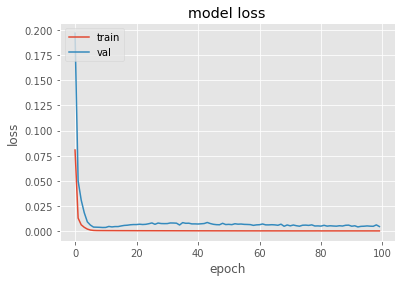

In [80]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [81]:
test_prediction = model.predict(X_test)
test_prediction = scaler.inverse_transform(test_prediction)
Y_test = scaler.inverse_transform([Y_test])

In [82]:
test_prediction.shape

(129, 1)

In [83]:
Y_test.shape

(1, 129)

In [84]:
Y_test = Y_test.reshape(-1)
test_prediction = test_prediction.reshape(-1)

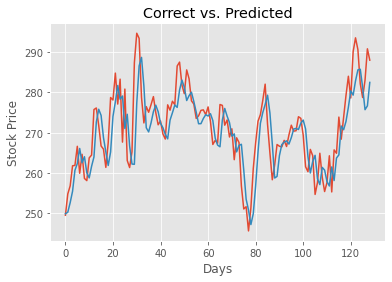

In [85]:
plt.plot(Y_test)
plt.plot(test_prediction)
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title("Correct vs. Predicted")
plt.show()

In [86]:
mse = mean_squared_error(Y_test, test_prediction)
rmse = math.sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 6.369799


##Prophet

In [87]:
pip install fbprophet

In [88]:
from fbprophet import Prophet

In [89]:
my_model = Prophet(interval_width=0.95)

In [90]:
df

,index,Date,Close,predict
0,0,2016-03-31,114.099998,0.000000
1,1,2016-04-01,116.059998,171.149931
2,2,2016-04-04,112.550003,118.021928
3,3,2016-04-05,112.220001,111.972081
4,4,2016-04-06,113.709999,111.514122
...,...,...,...,...
1255,1255,2021-03-25,278.739990,276.549943
1256,1256,2021-03-26,283.019989,276.679881
1257,1257,2021-03-29,290.820007,276.809819
1258,1258,2021-03-30,288.000000,276.939758


In [91]:
df.drop(columns = ['index', 'predict'], inplace = True)
df.columns = ['ds', 'y']

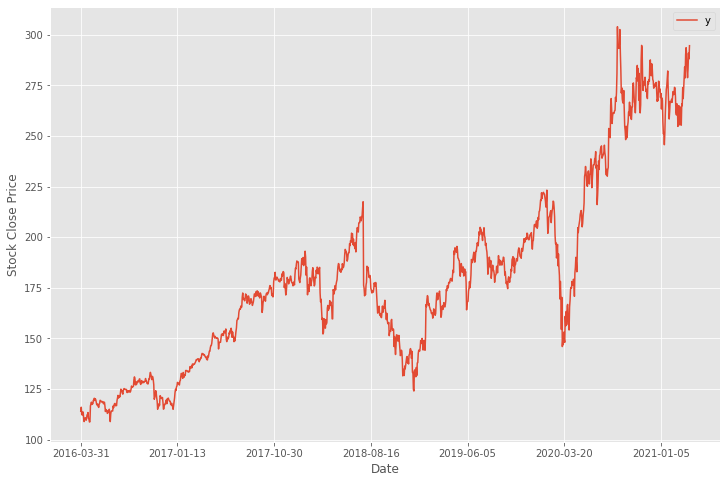

In [92]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Stock Close Price')
ax.set_xlabel('Date')
plt.show()

In [93]:
my_model = Prophet(interval_width=0.95)

In [94]:
train = df[:1125]
test = df[1125:]

In [95]:
my_model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [97]:
df

,ds,y
0,2016-03-31,114.099998
1,2016-04-01,116.059998
2,2016-04-04,112.550003
3,2016-04-05,112.220001
4,2016-04-06,113.709999
...,...,...
1255,2021-03-25,278.739990
1256,2021-03-26,283.019989
1257,2021-03-29,290.820007
1258,2021-03-30,288.000000


In [98]:
future_dates = my_model.make_future_dataframe(periods=135, freq='B')
future_dates.tail()

,ds
1255,2021-03-18
1256,2021-03-19
1257,2021-03-22
1258,2021-03-23
1259,2021-03-24


In [100]:
forecast = my_model.predict(future_dates)

In [101]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-03-31,120.676516,80.750350,122.350323,120.676516,120.676516,-20.303273,-20.303273,-20.303273,1.606067,1.606067,1.606067,-21.909340,-21.909340,-21.909340,0.0,0.0,0.0,100.373243
1,2016-04-01,120.597011,79.830211,121.775379,120.597011,120.597011,-20.104060,-20.104060,-20.104060,1.553602,1.553602,1.553602,-21.657662,-21.657662,-21.657662,0.0,0.0,0.0,100.492951
2,2016-04-04,120.358497,80.557081,121.109088,120.358497,120.358497,-19.482830,-19.482830,-19.482830,1.229110,1.229110,1.229110,-20.711940,-20.711940,-20.711940,0.0,0.0,0.0,100.875667
3,2016-04-05,120.278992,81.071871,121.062621,120.278992,120.278992,-18.775252,-18.775252,-18.775252,1.569483,1.569483,1.569483,-20.344736,-20.344736,-20.344736,0.0,0.0,0.0,101.503740
4,2016-04-06,120.199487,81.000027,122.164169,120.199487,120.199487,-18.261919,-18.261919,-18.261919,1.694416,1.694416,1.694416,-19.956335,-19.956335,-19.956335,0.0,0.0,0.0,101.937568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,2021-03-18,280.228890,218.067195,306.161653,240.764120,322.491348,-18.539320,-18.539320,-18.539320,1.606067,1.606067,1.606067,-20.145387,-20.145387,-20.145387,0.0,0.0,0.0,261.689570
1256,2021-03-19,280.421728,218.709309,307.688903,240.751530,323.071561,-19.127867,-19.127867,-19.127867,1.553602,1.553602,1.553602,-20.681469,-20.681469,-20.681469,0.0,0.0,0.0,261.293861
1257,2021-03-22,281.000244,214.029929,304.331724,240.713759,324.660432,-20.644897,-20.644897,-20.644897,1.229110,1.229110,1.229110,-21.874007,-21.874007,-21.874007,0.0,0.0,0.0,260.355347
1258,2021-03-23,281.193083,214.299204,307.773145,240.666042,324.970440,-20.561799,-20.561799,-20.561799,1.569483,1.569483,1.569483,-22.131283,-22.131283,-22.131283,0.0,0.0,0.0,260.631284


In [102]:
predicted = forecast['yhat'][1125:]

In [103]:
from math import sqrt
error = sqrt(mean_squared_error(test['y'], predicted))
print('Test RMSE: %.3f' % error)

Test RMSE: 15.091


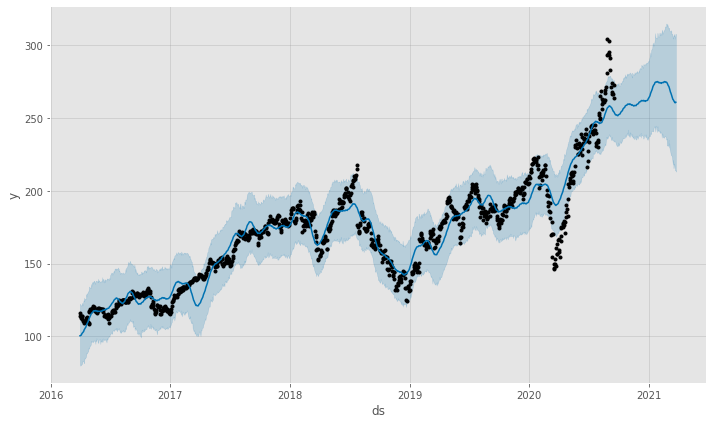

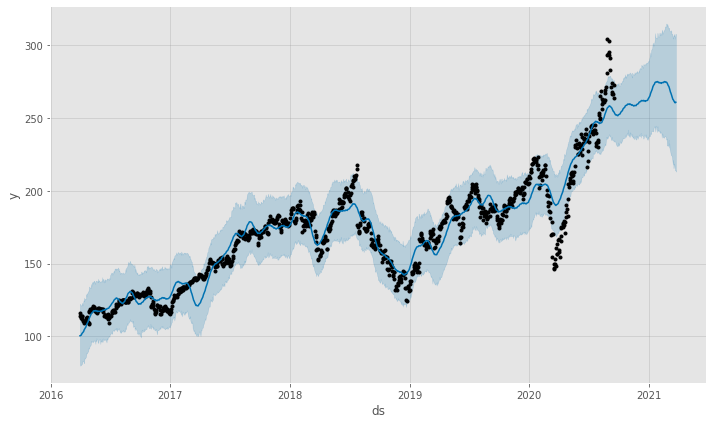

In [104]:
my_model.plot(forecast, uncertainty=True)

#**Conclusion** LSTM Model RMSE is lowest for test dataset. This shows LSTM model best fits the given Stock prices